# 1.4 Translation

Take a word vector and learn a mapping that will allow you to translate words by learning a transformation matrix.


## 1.4.1 Transforming vector

Consider two vectors $X,Y \in  \mathbb{R}^m$ and mapping  matrix $R \in \mathbb{R}^{m \times m}$ such that $X R \equiv Y.$  Here $R$ transform $X$ to $Y$. Our goal is to find such transformation matrix $R$ from the prodvided training sets $X$ and $Y$.
For Finding such $R$, we can start with some random matrix and then updating the value by minimising the distance between $RX$ and $Y$. 

* Initialize $R$ with some random matrix,

* Calculate loss by taking Frobenious norm over the distance between $XR$ and $Y$, 
$\text{Loss}:=\lVert XR-Y \rVert_F.$ 

* Take the gradient of the loss with $R$ , $g:= \frac{d}{dR}\text{Loss}.$ which is $g=\frac{d}{dR}\lVert XR-Y \rVert_F = \frac{2}{m}(X^{T}(XR-Y))$

* Update the gradient on $R$, $R:= R - \alpha g$ where $\alpha$ is the learning rate. 


## 1.4.2 Frobenius norm

Forbenius norm $\lVert . \rVert_F:\mathbb{R}^{m\times n} \rightarrow \mathbb{R}$ is defined as, 

$$\lVert A \rVert_F =\sqrt{ \sum_{i=0}^{m}\sum_{i=0}^{n}|a_{ij}|^2}\text{ } \forall A\in \mathbb{R}^{m \times n}$$

## 1.4.2 Example (Frobenius norm)

In [1]:
import numpy as np

In [9]:
# define a 2*2 matrix
A = np.array([[2,2],[2,2]])
A_squared = np.square(A)
print('Original Matrix A={}'.format(A))
print('Square of A ={}'.format(A_squared))

Original Matrix A=[[2 2]
 [2 2]]
Square of A =[[4 4]
 [4 4]]


In [12]:
# Frobenius of A
A_Frobenius = np.sqrt(np.sum(A_squared))
print('Frobenius norm of A:',A_Frobenius)

Frobenius norm of A: 4.0


## 1.4.3 Example (Transforming Vectors)

There are three main vector transformations:
* Scaling
* Translation
* Rotation - The rotation operation changes the direction of a vector, letting unaffected its dimensionality and its norm.

In [14]:
import numpy as np                     # Import numpy for array manipulation
import matplotlib.pyplot as plt        # Import matplotlib for charts

In [16]:
# Create a 2 x 2 matrix
R = np.array([[2, 0],
              [0, -2]])
# Create a 1 x 2 matrix
x = np.array([[1, 1]]) 

Note: The dot product between a vector and a square matrix produces a rotation and a scaling of the original vector.

In [17]:
y = np.dot(x, R) # Apply the dot product between x and R
y

array([[ 2, -2]])

## 1.4.4 Rotation Matrix


Data that is composed of 2 real attributes is telling to belong to a $ RxR $ or $ R^2 $ space. Rotation matrices in $R^2$ rotate a given vector $\vec x$ by a counterclockwise angle $\theta$ in a fixed coordinate system. Rotation matrices are of the form:

$$Ro = \begin{bmatrix} cos \theta & -sin \theta \\ sin \theta & cos \theta \end{bmatrix}$$
Rotation Matrix which rotates vector by $100^0$, numpy requires angle to be in radians so convert 100 degree to radians.

In [39]:
angle = 100 * (np.pi / 180) #convert degrees to radians

Ro = np.array([[np.cos(angle), -np.sin(angle)],
              [np.sin(angle), np.cos(angle)]])

x2 = np.array([2, 2]).reshape(1, -1) # make it a row vector
y2 = np.dot(x2, Ro)

print('Rotation matrix')
print(Ro)
print('\nRotated vector')
print(y2)

print('\n x2 norm', np.linalg.norm(x2))
print('\n y2 norm', np.linalg.norm(y2))
print('\n Rotation matrix norm', np.linalg.norm(Ro))

Rotation matrix
[[-0.17364818 -0.98480775]
 [ 0.98480775 -0.17364818]]

Rotated vector
[[ 1.62231915 -2.31691186]]

 x2 norm 2.8284271247461903

 y2 norm 2.82842712474619

 Rotation matrix norm 1.414213562373095


Some points to note:

* The norm of the input vector is the same as the norm of the output vector. Rotations matrices do not modify the norm of the vector, only its direction.
* The norm of any $R^2$ rotation matrix is always $\sqrt 2 = 1.414221$

In [42]:
Ro_squared = np.square(Ro)
Ro_Frobenius = np.sqrt(np.sum(Ro_squared))
Ro_Frobenius

1.414213562373095

Nearest neighbours, after you have computed the output of XRXR you get a vector. You then need to find the most similar vectors to your output. For this purpose we can use nearest neighbors technique. 
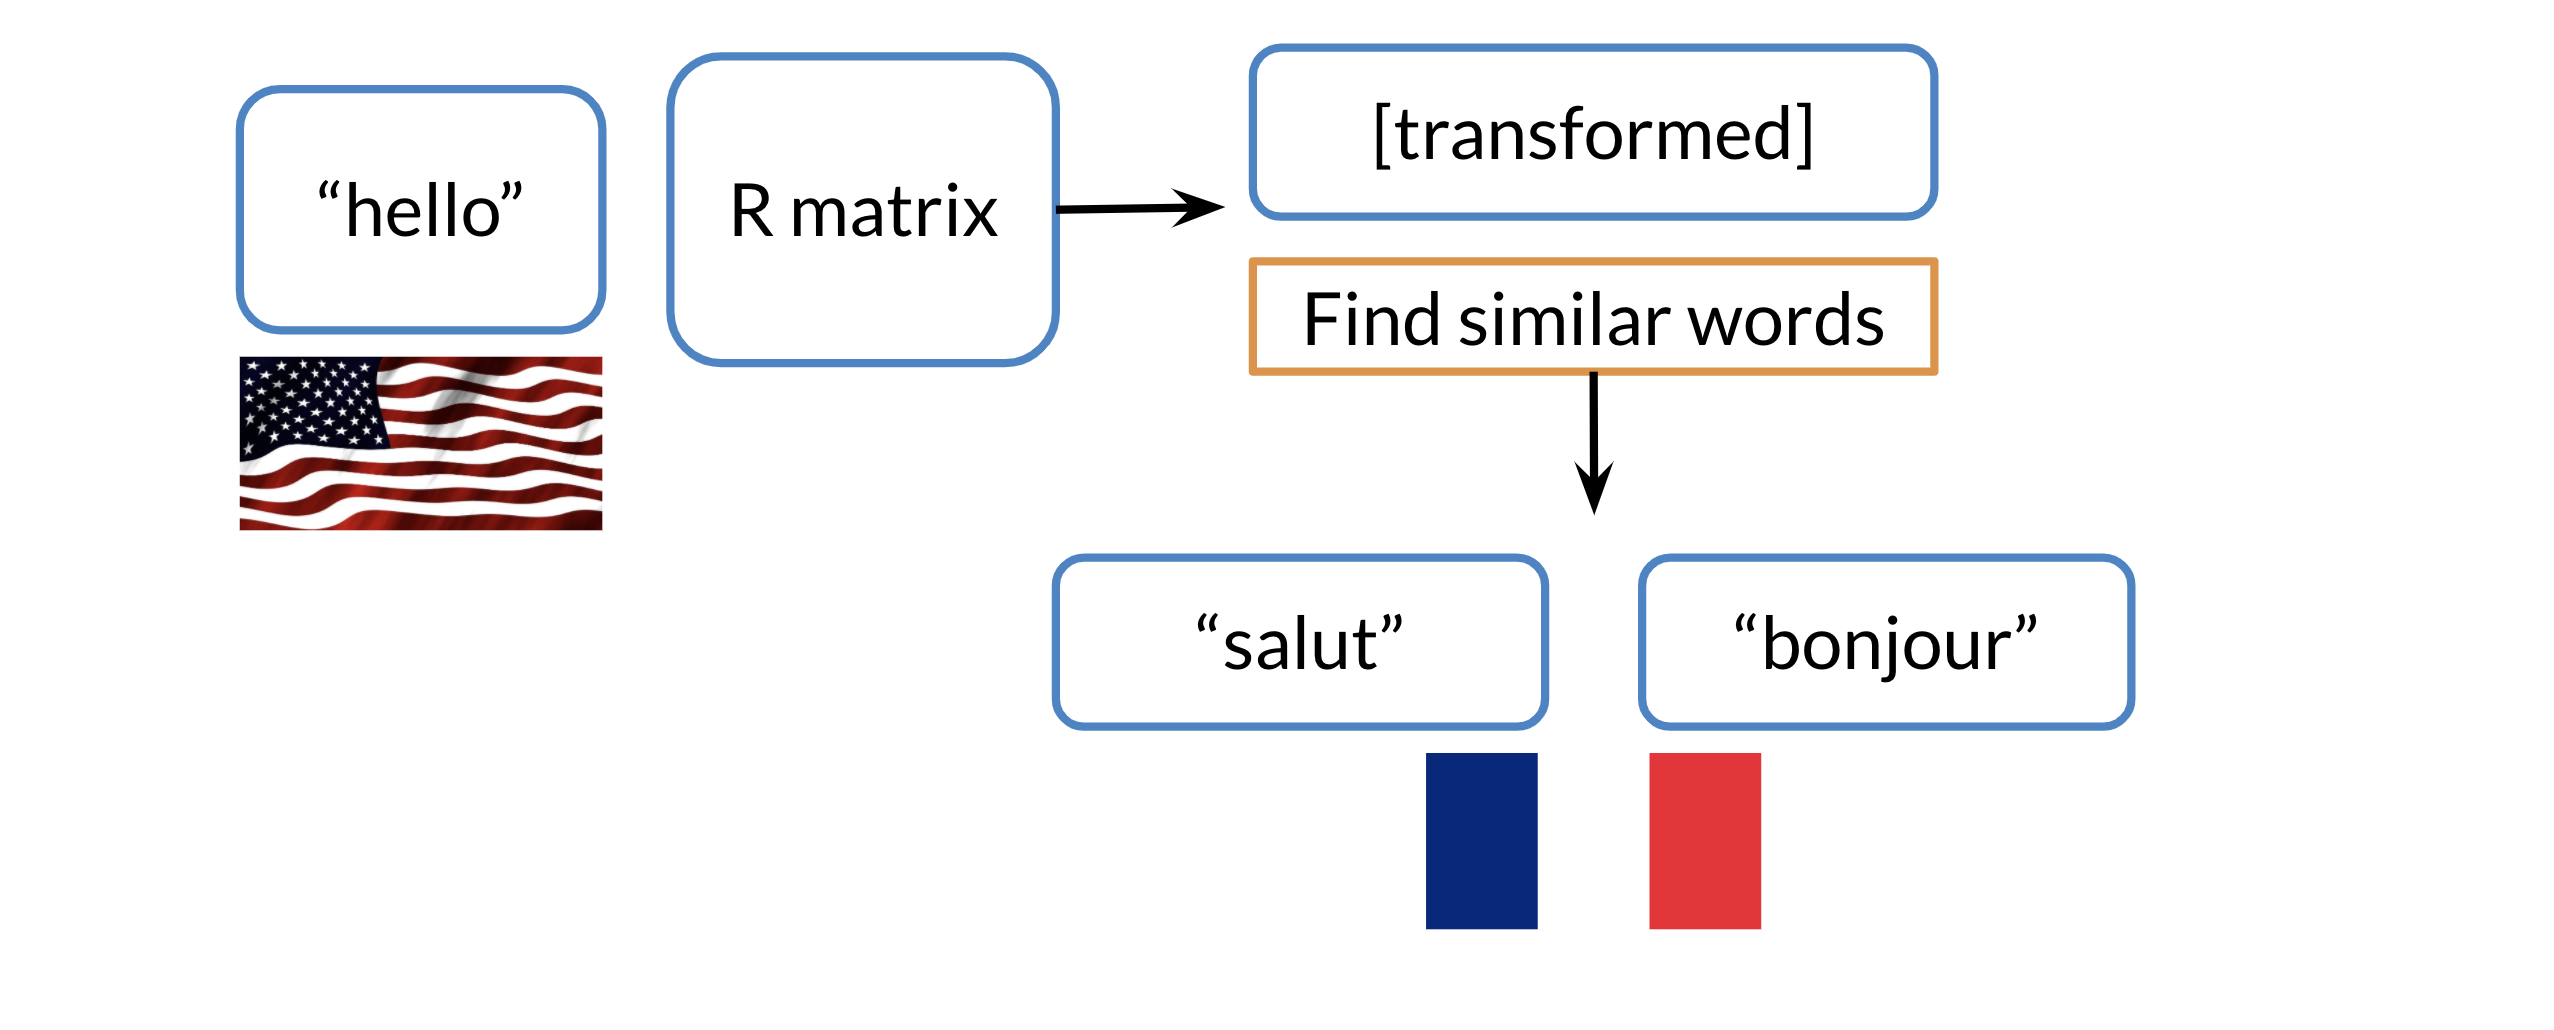

## 1.4.5 Hash Function 

Hash function, function which allocate a vector $V$  with a hash value. 

For number of buckets $n$, a simple hash table can be generated by the following function, 
$\phi: V \rightarrow n\mathbb{Z}$, such that $\phi(v_i)=\text{int}(v_i)\text{ \% } n$. The following python function returns a hash table. 

In [46]:
def basic_hash_table(value_1,n_buckets):
    def hash_function(value_1,n_buckets):
        return int(value)% n_buckets
    hash_table = {i:[] for i in range(n_buckets)}
    for value in value_1:
        hash_value = hash_function(value,n_buckets)
        hash_table[hash_value].append(value)
    return hash_table

In [50]:
value_1 = [14,10,17,100,97,11,43]
n_buckets = 10
basic_hash_table(value_1,n_buckets)

{0: [10, 100],
 1: [11],
 2: [],
 3: [43],
 4: [14],
 5: [],
 6: [],
 7: [17, 97],
 8: [],
 9: []}

## 1.4.6 Locality Sensitive hashing

Locality sensitive hashing is a technique that allows you to hash similar inputs into the same buckets with high probability. 
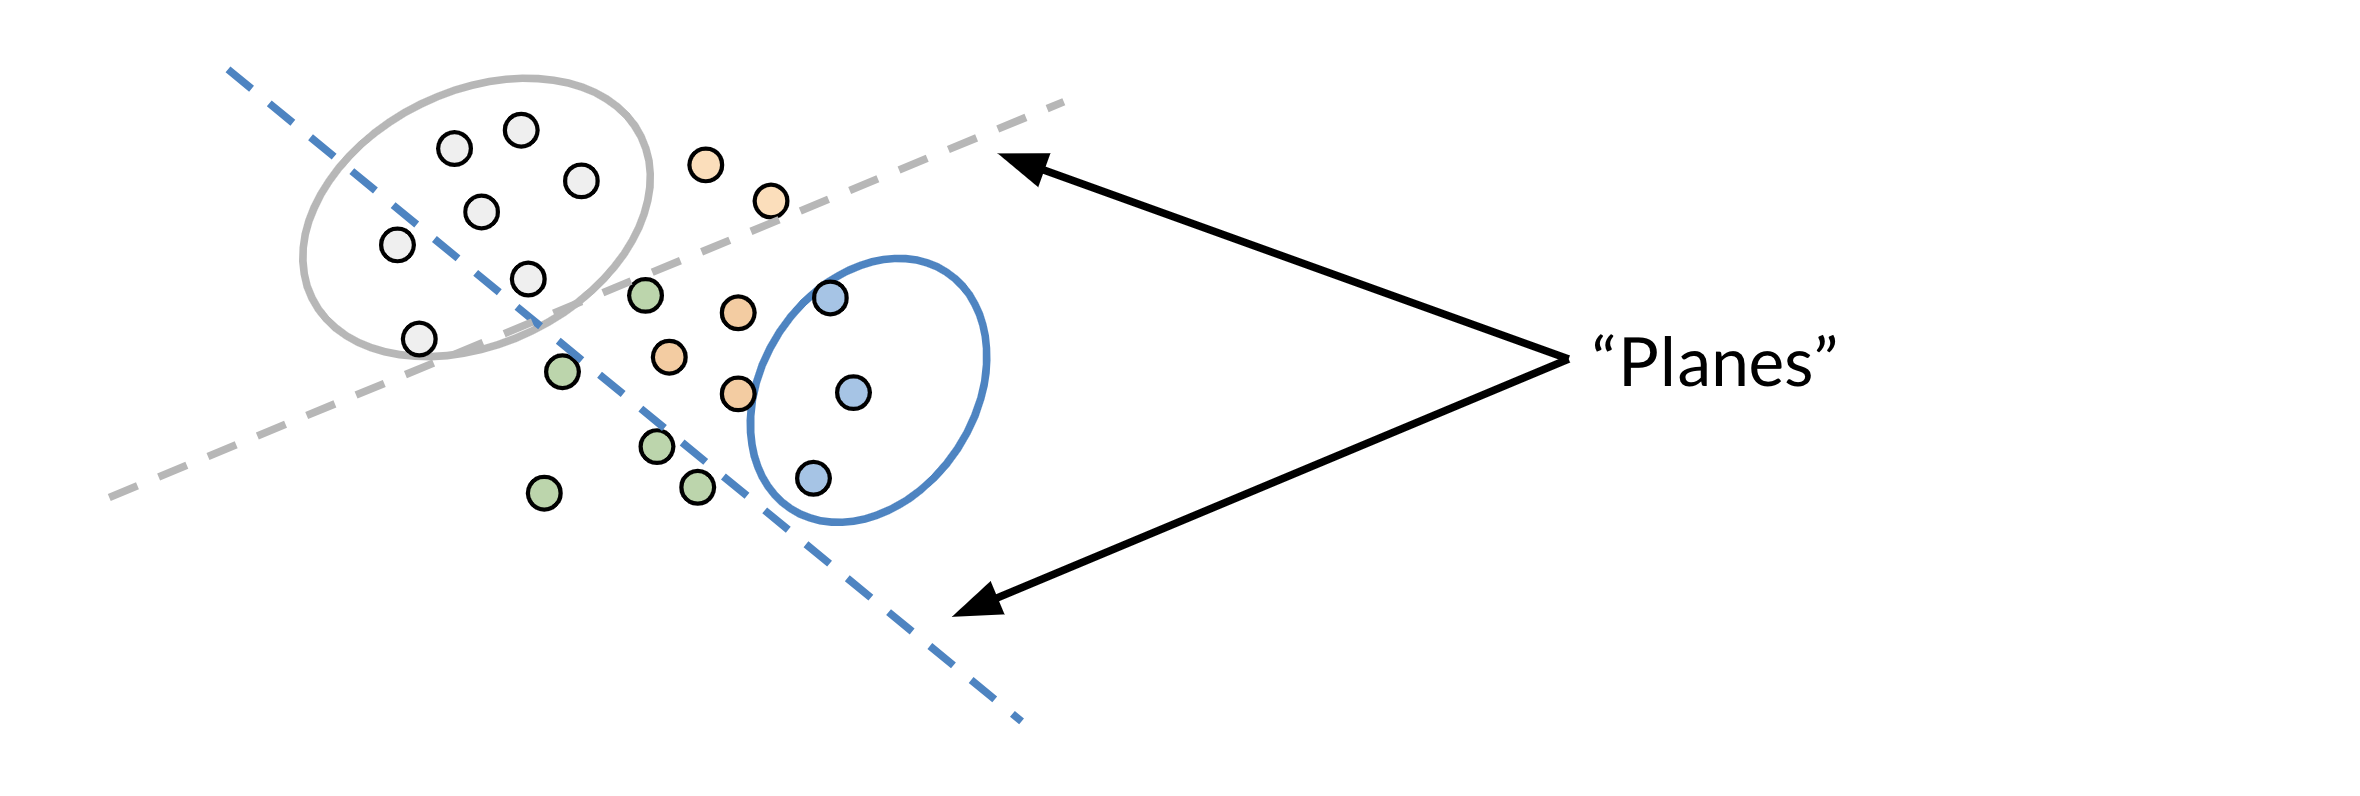
Instead of the typical buckets we have been using, you can think of clustering the points by deciding whether they are above or below the line. 


In [51]:
def side_of_plane(P,v):
    dotproduct = np.dot(P,v.T)
    sign_of_dot_product = np.sign(dotproduct)
    sign_of_dot_product_scalar = np.asscalar(sign_of_dot_product)
    return sign_of_dot_product_scalar

In [56]:
P = np.array([1,1])
v= np.array([-1,-1])
print(side_of_plane(P,v))

-1


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  after removing the cwd from sys.path.


For multiple plane the single hash value is detected as follows,

$\text{sign}_i \geq 0 \rightarrow h_i = 1$

$\text{sign}_i < 0 \rightarrow h_i = 0$, and 

hash value is calculated as follows,

hash = $\sum_{i}^{H}2^i \times h_i$


In [58]:
def hash_multiple_plane(p_1,v):
    hash_value = 0
    for i,p in enumerate(p_1):
        sign = side_of_plane(P,v)
        hash_i = 1 if sign >=0 else 0
        hash_value += 2 ** i * hash_i
    return hash_value

## Random plane

In [59]:
num_dimensions = 2 
num_planes = 3

random_planes_matrix = np.random.normal(
size=(num_planes,num_dimensions))

In [60]:
v = np.array([[2,2]])

In [61]:
def side_of_plane_matrix(P,v):
    dotproduct = np.dot(P,v.T)
    sign_of_dot_product = np.sign(dotproduct)
    return sign_of_dot_product

In [62]:
num_planes_matrix = side_of_plane_matrix(random_planes_matrix,v)

In [63]:
num_planes_matrix

array([[-1.],
       [ 1.],
       [ 1.]])